In [101]:
def check(value, message):
    """If 'value' is None, prints an error message constructed using
    'message' and then exits with status code 1.  If 'value' is an integer,
    it assumes it is a libSBML return status code.  If the code value is
    LIBSBML_OPERATION_SUCCESS, returns without further action; if it is not,
    prints an error message constructed using 'message' along with text from
    libSBML explaining the meaning of the code, and exits with status code 1.
    """
    if value == None:
         raise libsbml.SystemExit('LibSBML returned a null value trying to ' + message + '.')
    elif type(value) is int:
        if value == libsbml.LIBSBML_OPERATION_SUCCESS:
            return
        else:
            err_msg = 'Error encountered trying to ' + message + '.' \
                 + 'LibSBML returned error code ' + str(value) + ': "' \
                 + libsbml.OperationReturnValue_toString(value).strip() + '"'
            raise libsbml.SystemExit(err_msg)
    else:
         return

# Convert EGFR model to SBML

In [102]:
import pandas as pd

excel = '../EGFR/rsfs20130019supp1.xlsx'
species = pd.read_excel(excel,sheet_name='Species',index_col='Name')
species

,InitialAmount,InitialAmountUnits,ConstantAmount,BoundaryCondition,Notes,Tag
Name,,,,,,
IGF,1.350000e-09,concentration (M),False,True,NaN,NaN
IGFR,4.000000e+04,molecules/cell,False,False,NaN,NaN
IGFR_p,0.000000e+00,molecules/cell,False,False,NaN,NaN
IGF__IGFR,0.000000e+00,molecules/cell,False,False,NaN,NaN
IGF__IGFR_p,0.000000e+00,molecules/cell,False,False,NaN,NaN
...,...,...,...,...,...,...
IGFR__IGFRinh,0.000000e+00,molecules/cell,False,False,NaN,NaN
mTor_p__IRS_p__Grb2SOS__RasGDP,0.000000e+00,molecules/cell,False,False,NaN,NaN
mTor_p__IRS_p__PI3K__Grb2SOS__RasGDP,0.000000e+00,molecules/cell,False,False,NaN,NaN


In [47]:
bool(species.loc['mTorinh'].to_dict()['BoundaryCondition'])

True

In [103]:
compartments = pd.read_excel(excel,sheet_name='Compartments', index_col='Name')
compartments

,Capacity,CapacityUnits,ConstantCapacity,Parent
Name,,,,
Cell,1,cell,True,NaN


In [131]:
import libsbml
m = libsbml.Model(3,1)
compartments = pd.read_excel(excel,sheet_name='Compartments', index_col='Name')
for compartment in compartments.index:
    atts = compartments.loc[compartment].to_dict()
    c = m.createCompartment()
    check(c, "create compartment {}".format(compartment))
    check(c.setId(compartment),    "set id of compartment {}".format(compartment))
    check(c.setSize(float(atts['Capacity'])),  "set capacity to {}".format(atts['Capacity']))
    check(c.setConstant(bool(atts['ConstantCapacity'])),  "set compartment to constant")
    
for specie in species.index:
    atts = species.loc[specie].to_dict()
    s = m.createSpecies()
    check(s,   "create species {}".format(specie))
    check(s.setId(specie),  "set species {} id".format(specie))
    check(s.setName(specie),  "set species {} name".format(specie))
    check(s.setInitialAmount(atts['InitialAmount']), "set initial amount {} for specie {}".format(
        atts['InitialAmount'], specie))
    check(s.setCompartment(compartment),  "set compartment to {}".format(compartment))
    check(s.setHasOnlySubstanceUnits(True),  "set substance units to mole")
    check(s.setConstant(bool(atts['ConstantAmount'])),  "set specie {} to constant amount {}".format(
            specie, atts['ConstantAmount']))
    
    check(s.setBoundaryCondition(bool(atts['BoundaryCondition'])), "set specie {} boundary condition to {}".format(
            specie, bool(atts['BoundaryCondition'])))
   

In [125]:
parameters = pd.read_excel(excel,sheet_name='Parameters', index_col='Name')
parameters

,Value,ValueUnits,ConstantValue,Notes,Tag
Name,,,,,
lig_time,0.0,NaN,False,NaN,NaN
inh0,0.0,NaN,False,NaN,NaN
inh1,0.0,NaN,False,NaN,NaN
k1,400000.0,1/(Molar*seconds),False,1. IGF binding,NaN
k1a,400000.0,1/(Molar*seconds),False,1. IGF binding,NaN
...,...,...,...,...,...
kd301a,0.5,NaN,True,21. AKT inhibition,NaN
k302,500000000.0,NaN,True,22. IGFR inhibitor,NaN
kd302,0.5,NaN,True,22. IGFR inhibitor,NaN


In [132]:
for parameter in parameters.index:
    atts = parameters.loc[parameter].to_dict()
    k = m.createParameter()
    check(k,  "create parameter")
    check(k.setId(parameter),  "set parameter {}".format(parameter))
    check(k.setConstant(bool(atts['ConstantValue'])), "set paramter {} to constant = {}".format(
        parameter, bool(atts['ConstantValue'])))
    check(k.setValue(atts['Value']),  "set value of parameter {} to value {}".format(
        parameter, atts['Value']))
    
    

In [110]:
import numpy as np
rxns

,Reactant1,Reactant2,kfor,krev,Product1,Product2,Reaction,KineticLaw,ReactionRate,Reversible,Active,Notes,Tag
Name,,,,,,,,,,,,,
1. IGF binding,IGF,IGFR,k1,kd1,IGF__IGFR,NaN,IGF + IGFR <-> IGF__IGFR,MassAction,k1*IGF*IGFR - kd1*IGF__IGFR,True,True,NaN,NaN
1. IGF phospho,IGF__IGFR,NaN,k2,NaN,IGF__IGFR_p,NaN,IGF__IGFR -> IGF__IGFR_p,MassAction,k2*IGF__IGFR,False,True,NaN,NaN
1. IGF binding_1,IGF,IGFR_p,k1a,kd1a,IGF__IGFR_p,NaN,IGF + IGFR_p <-> IGF__IGFR_p,MassAction,k1a*IGF*IGFR_p - kd1a*IGF__IGFR_p,True,True,NaN,NaN
2. PTB1B,IGF__IGFR_p,PTB1B,k3,kd3,IGF__IGFR_p__PTB1B,NaN,IGF__IGFR_p + PTB1B <-> IGF__IGFR_p__PTB1B,MassAction,k3*IGF__IGFR_p*PTB1B - kd3*IGF__IGFR_p__PTB1B,True,True,NaN,NaN
2. PTB1B_1,IGFR_p,PTB1B,k3a,kd3a,IGFR_p__PTB1B,NaN,IGFR_p + PTB1B <-> IGFR_p__PTB1B,MassAction,k3a*IGFR_p*PTB1B - kd3a*IGFR_p__PTB1B,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21. AKT inhibition (INACTIVE),AKTinh,AKT,k301,kd301,AKT__AKTinh,NaN,AKTinh + AKT <-> AKT__AKTinh,MassAction,k301*AKTinh*AKT - kd301*AKT__AKTinh,True,False,NaN,NaN
21. AKT inhibition_1 (INACTIVE),AKTinh,IRS_p__PI3K__AKT,k301a,kd301a,IRS_p__PI3K__AKT__AKTinh,NaN,AKTinh + IRS_p__PI3K__AKT <-> IRS_p__PI3K__AKT...,MassAction,k301a*AKTinh*IRS_p__PI3K__AKT - kd301a*IRS_p__...,True,False,NaN,NaN
21. AKT inhibition_2 (INACTIVE),AKT__AKTinh,IRS_p__PI3K,k101a,kd101a,IRS_p__PI3K__AKT__AKTinh,NaN,AKT__AKTinh + IRS_p__PI3K <-> IRS_p__PI3K__AKT...,MassAction,k101a*AKT__AKTinh*IRS_p__PI3K - kd101a*IRS_p__...,True,False,NaN,NaN


In [133]:
rxns = pd.read_excel(excel,sheet_name='Reactions',index_col='Name')
for i,rxn in enumerate(rxns.index):
    atts = rxns.loc[rxn].to_dict()
    r = m.createReaction()
    check(r,  "create reaction")
    check(r.setId('rxn_{}'.format(i)),   "set reaction id")
    check(r.setName(rxn),  "set reaction name")
    check(r.setReversible(bool(atts['Reversible'])), "Set reversible")
    check(r.setFast(bool(atts['Active'])), "Set Fast")

    reactant1 = r.createReactant()
    check(reactant1, "create reactant1")
    check(reactant1.setSpecies(atts['Reactant1']), "assign reactant 1 species")
    check(reactant1.setConstant(bool(species.loc[atts['Reactant1'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Reactant1'], bool(species.loc[atts['Reactant1'], 'ConstantAmount'])))
    if atts['Reactant2'] and type(atts['Reactant2']) is str:
        reactant2 = r.createReactant()
        check(reactant2, "create reactant 2")
        check(reactant2.setSpecies(atts['Reactant2']), "assign reactant 2 species")
        check(reactant2.setConstant(bool(species.loc[atts['Reactant2'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Reactant2'], bool(species.loc[atts['Reactant2'], 'ConstantAmount'])))
    product1 = r.createProduct()
    check(product1,  "create product 1")
    check(product1.setSpecies(atts['Product1']),  "assign product 1 species")
    check(product1.setConstant(bool(species.loc[atts['Product1'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Product1'], bool(species.loc[atts['Product1'], 'ConstantAmount'])))

    if atts['Product2'] and type(atts['Product2']) is str:
        product2 = r.createProduct()
        check(product2,  "create product 2")
        check(product2.setSpecies(atts['Product2']), "assign product 2 species")
        check(product2.setConstant(bool(species.loc[atts['Product2'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Product2'], bool(species.loc[atts['Product2'], 'ConstantAmount'])))
       
    
    math_ast = libsbml.parseL3Formula(atts['ReactionRate'])
    check(math_ast,   "create AST for rate expression")
    kinetic_law = r.createKineticLaw()
    check(kinetic_law,  "create kinetic law")
    check(kinetic_law.setMath(math_ast),  "set math on kinetic law")
    



In [134]:


d = libsbml.SBMLDocument(3,1)
d.setModel(m)
w = libsbml.SBMLWriter()
w.writeSBML(d, '../EGFR/EGFR.sbml')

True

In [92]:
!ls -l ../EGFR


total 192
-rw-r--r--  1 zuck016  PNL\Domain Users  62526 Aug 18 18:04 EGFR.sbml
-rw-r--r--  1 zuck016  PNL\Domain Users     72 Aug 18 15:23 Untitled.ipynb
-rw-r--r--@ 1 zuck016  PNL\Domain Users  27990 Aug 11 11:15 rsfs20130019supp1.xlsx


In [2]:
import tellurium as te
r = te.loadSBMLModel('../EGFR/EGFR.sbml')


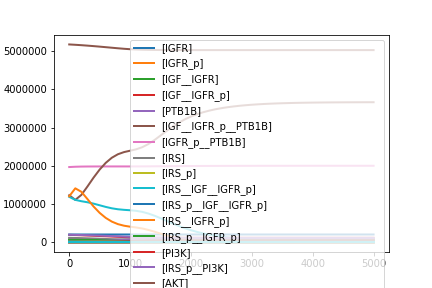

In [4]:
result = r.simulate(0, 5000)
r.plot(result)

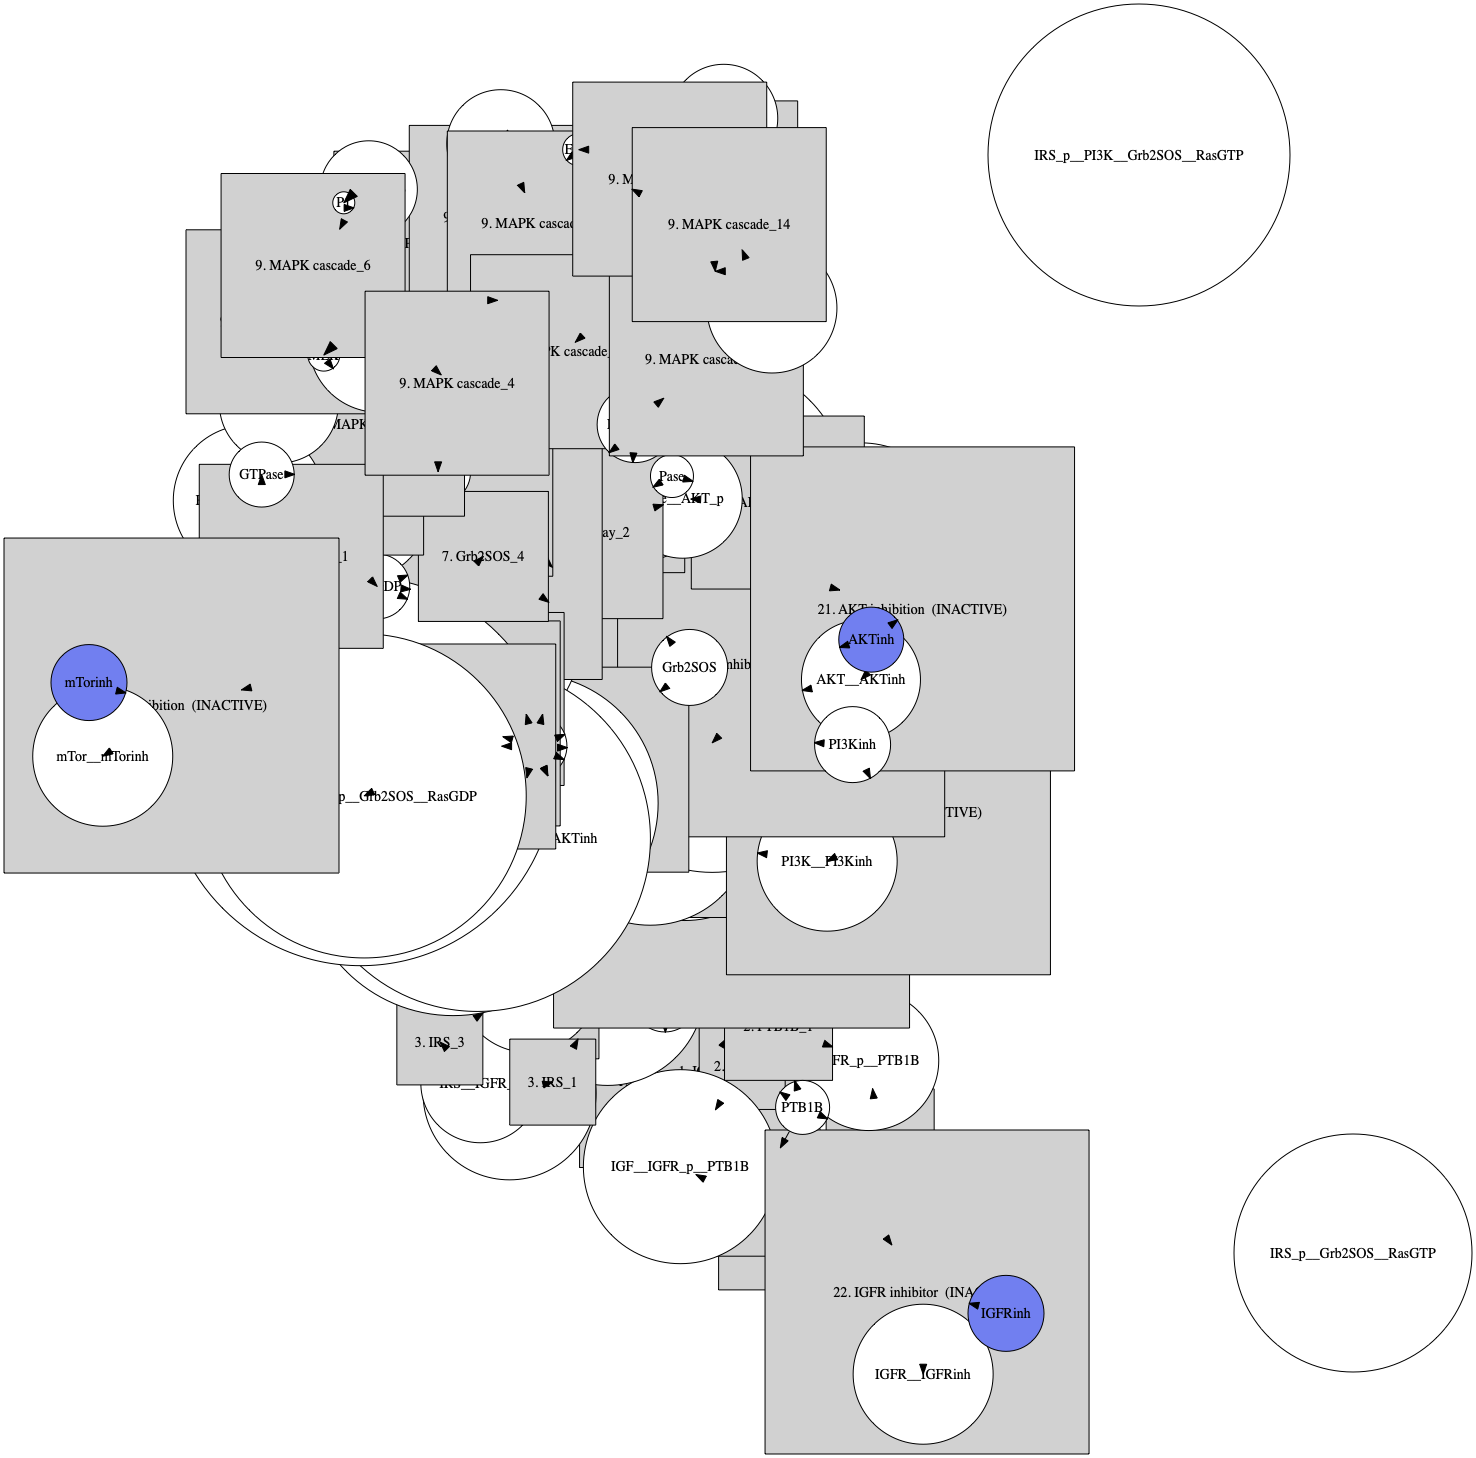

In [139]:
r.draw(width=300)

In [1]:
%matplotlib inline
from libsbml_draw import SBMLlayout

s = SBMLlayout("../EGFR/EGFR.sbml")

s.drawNetwork("../EGFR/EGFR.pdf", dpi=25, scaling_factor=.25, show=False)

#s.drawNetwork()

updating network


In [3]:
s.writeSBML("../EGFR/EGFR-layout.sbml")


0